# 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# Read metadata
df = pd.read_csv('./skin-cancer-mnist/HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
# Fill null age in csv file with mean value of age
df['age'].fillna(int(df['age'].mean()),inplace=True)

In [6]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_dir = '.\skin-cancer-mnist'

# Merge images from both folders into one dictionary
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_dir, '*', '*.jpg'))}

In [7]:
# Cell type index
# 0 - Actinic keratoses	
# 1 - Basal cell carcinoma
# 2 - Benign keratosis-like lesions
# 3 - Dermatofibroma	
# 4 - Melanocytic nevi
# 5 - Melanoma
# 6 - Vascular lesions
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\skin-cancer-mnist\HAM10000_images_part_1\ISI...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,.\skin-cancer-mnist\HAM10000_images_part_1\ISI...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,.\skin-cancer-mnist\HAM10000_images_part_1\ISI...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,.\skin-cancer-mnist\HAM10000_images_part_1\ISI...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,.\skin-cancer-mnist\HAM10000_images_part_2\ISI...,Benign keratosis-like lesions,2


In [8]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

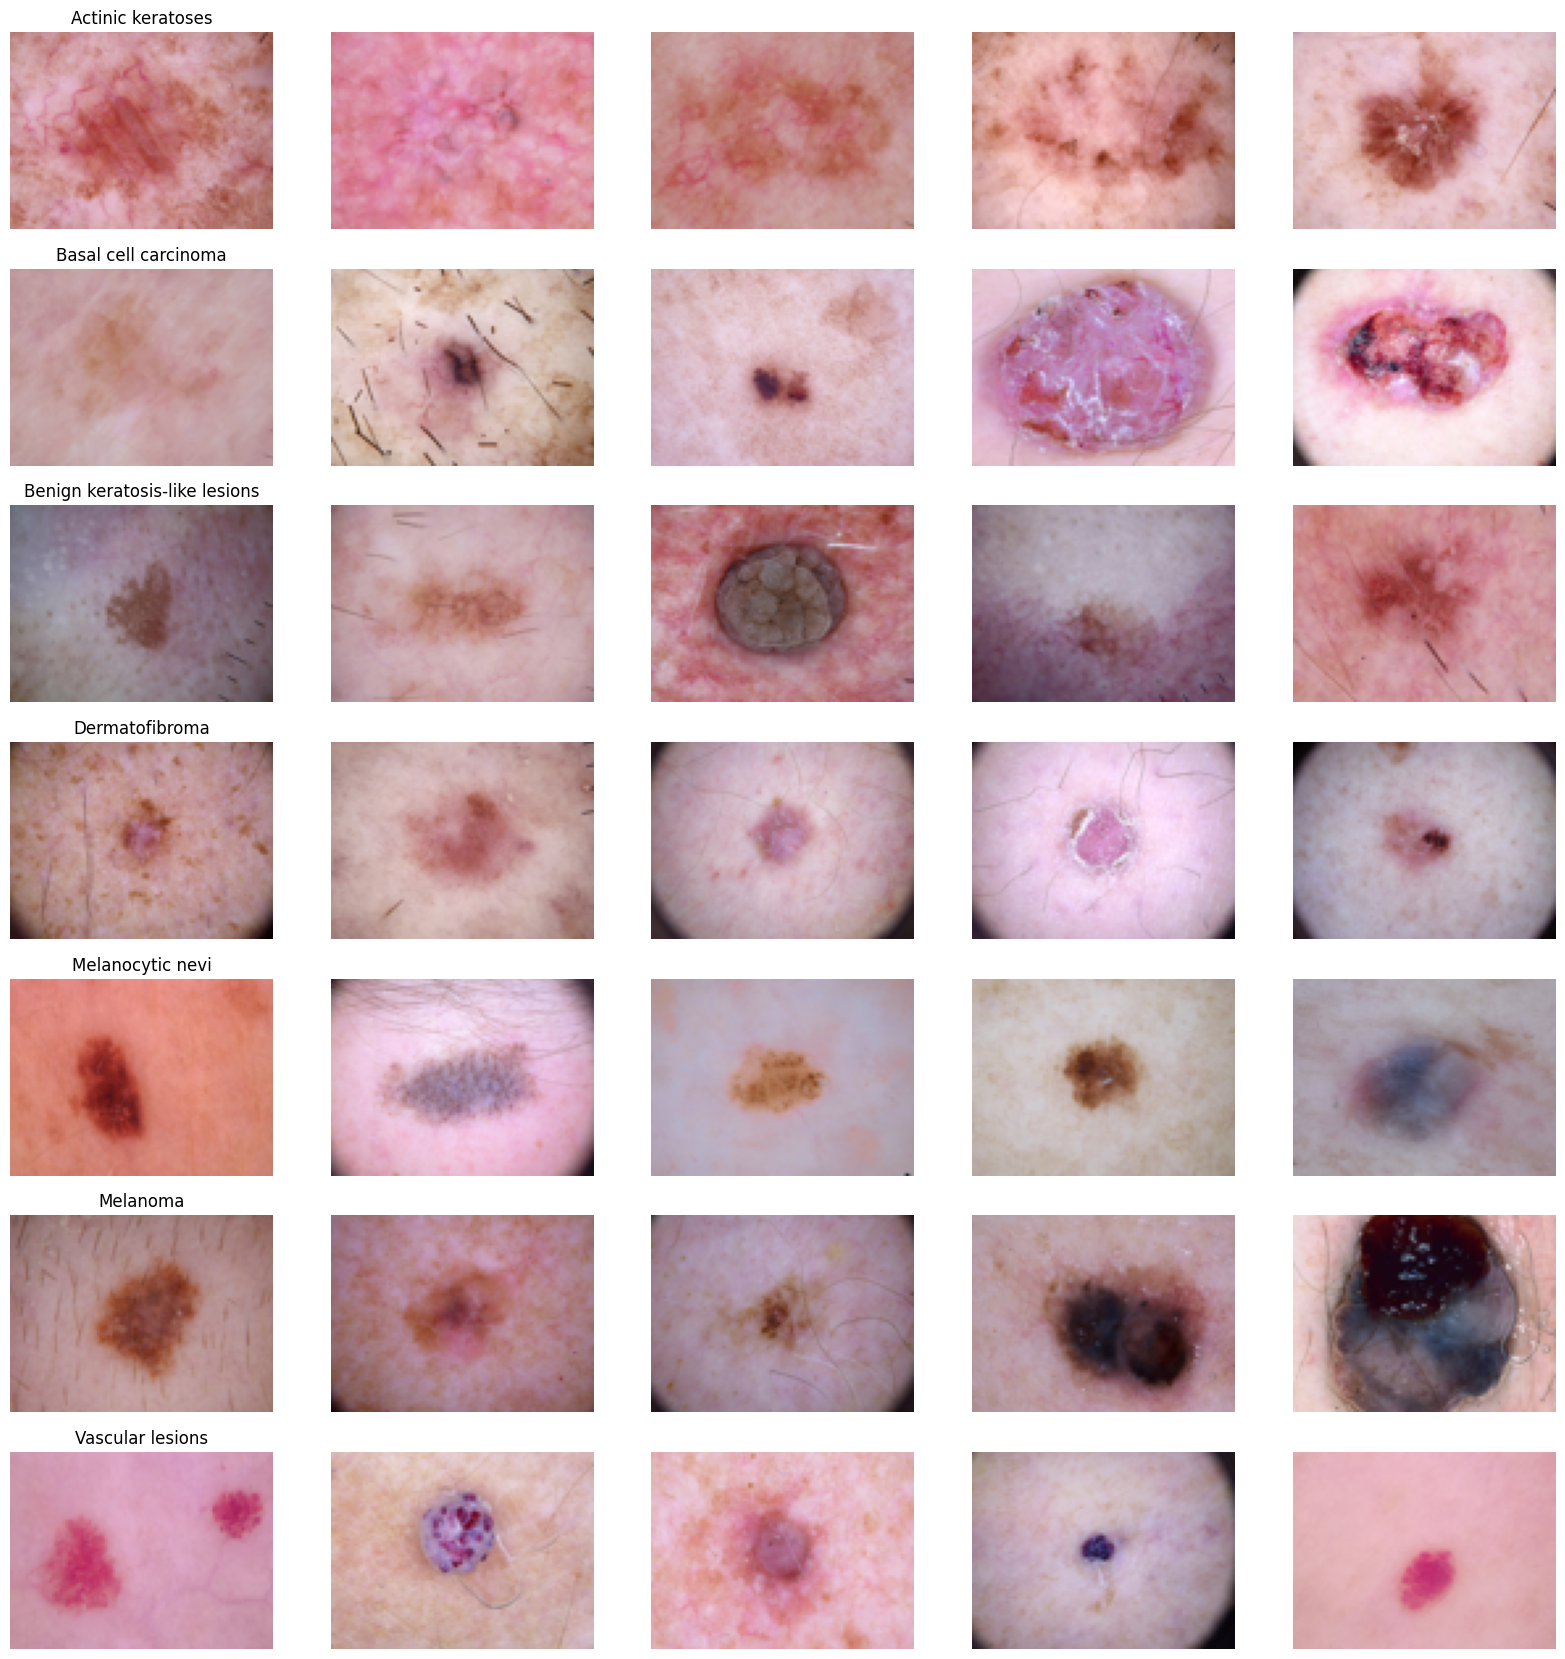

In [9]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


In [12]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [30]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

In [31]:
x_train_o

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,image
8442,HAM_0006451,ISIC_0032274,nv,histo,50.0,female,back,.\skin-cancer-mnist\HAM10000_images_part_2\ISI...,Melanocytic nevi,"[[[156, 114, 126], [160, 120, 131], [164, 125,..."
2908,HAM_0003941,ISIC_0029745,bcc,histo,35.0,male,face,.\skin-cancer-mnist\HAM10000_images_part_2\ISI...,Basal cell carcinoma,"[[[202, 147, 163], [201, 144, 162], [200, 143,..."
8909,HAM_0001989,ISIC_0030251,nv,histo,65.0,male,lower extremity,.\skin-cancer-mnist\HAM10000_images_part_2\ISI...,Melanocytic nevi,"[[[182, 162, 157], [186, 166, 160], [188, 168,..."
58,HAM_0000700,ISIC_0028052,bkl,histo,60.0,male,face,.\skin-cancer-mnist\HAM10000_images_part_1\ISI...,Benign keratosis-like lesions,"[[[30, 16, 23], [33, 20, 27], [43, 28, 38], [5..."
2960,HAM_0000868,ISIC_0032316,bcc,histo,65.0,male,face,.\skin-cancer-mnist\HAM10000_images_part_2\ISI...,Basal cell carcinoma,"[[[155, 101, 97], [155, 102, 98], [159, 109, 1..."
...,...,...,...,...,...,...,...,...,...,...
664,HAM_0006732,ISIC_0024336,bkl,histo,50.0,female,lower extremity,.\skin-cancer-mnist\HAM10000_images_part_1\ISI...,Benign keratosis-like lesions,"[[[152, 131, 141], [151, 130, 139], [155, 133,..."
7540,HAM_0003614,ISIC_0032560,nv,histo,40.0,male,chest,.\skin-cancer-mnist\HAM10000_images_part_2\ISI...,Melanocytic nevi,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
7221,HAM_0001097,ISIC_0032950,nv,histo,50.0,female,chest,.\skin-cancer-mnist\HAM10000_images_part_2\ISI...,Melanocytic nevi,"[[[62, 38, 56], [83, 53, 72], [99, 69, 85], [1..."
1318,HAM_0006692,ISIC_0029630,mel,histo,80.0,male,scalp,.\skin-cancer-mnist\HAM10000_images_part_2\ISI...,Melanoma,"[[[181, 150, 186], [182, 147, 183], [181, 141,..."


In [32]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train = x_train / 255
x_test = x_test / 255
# x_train_mean = np.mean(x_train)
# x_train_std = np.std(x_train)

# x_test_mean = np.mean(x_test)
# x_test_std = np.std(x_test)

# x_train = (x_train - x_train_mean) / x_train_std
# x_test = (x_test - x_test_mean )/ x_test_std

In [39]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [40]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)
x_train[0].shape

(75, 100, 3)

In [41]:
x_train = x_train.reshape(x_train.shape[0], * (75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], * (75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], * (75, 100, 3))
x_validate[0].shape

(75, 100, 3)

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [42]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential

In [117]:
input_shape = (75, 100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding = 'Same', input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu', padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 75, 100, 32)       896       
                                                                 
 conv2d_38 (Conv2D)          (None, 75, 100, 64)       18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 37, 50, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 37, 50, 64)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 37, 50, 64)        36928     
                                                                 
 conv2d_40 (Conv2D)          (None, 37, 50, 64)        36928     
                                                     

In [118]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
              metrics=['accuracy'])

In [119]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [120]:
# Fit the model
epochs = 55
batch_size = 16
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_validate, y_validate),
                    verbose=1,
                    callbacks=[learning_rate_reduction]
                   )

Epoch 1/55
451/451 [==============================] - 8s 16ms/step - loss: 1.0572 - accuracy: 0.6705 - val_loss: 0.9680 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 2/55
451/451 [==============================] - 7s 15ms/step - loss: 0.9700 - accuracy: 0.6709 - val_loss: 0.9496 - val_accuracy: 0.6845 - lr: 0.0010
Epoch 3/55
451/451 [==============================] - 7s 15ms/step - loss: 0.9308 - accuracy: 0.6721 - val_loss: 0.8949 - val_accuracy: 0.6771 - lr: 0.0010
Epoch 4/55
451/451 [==============================] - 7s 15ms/step - loss: 0.9084 - accuracy: 0.6766 - val_loss: 0.8905 - val_accuracy: 0.6808 - lr: 0.0010
Epoch 5/55
451/451 [==============================] - ETA: 0s - loss: 0.8829 - accuracy: 0.6847
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
451/451 [==============================] - 7s 16ms/step - loss: 0.8829 - accuracy: 0.6847 - val_loss: 0.8461 - val_accuracy: 0.6845 - lr: 0.0010
Epoch 6/55
451/451 [==============================] - 7s 15

In [130]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

26/26 [==============================] - 0s 4ms/step - loss: 0.6239 - accuracy: 0.7743
Validation: accuracy = 0.774314  ;  loss_v = 0.623950
Test: accuracy = 0.772341  ;  loss = 0.631257


In [129]:
model.save("model2.h5")

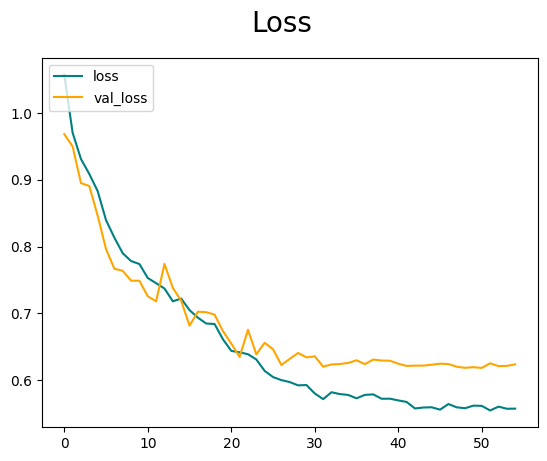

In [123]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

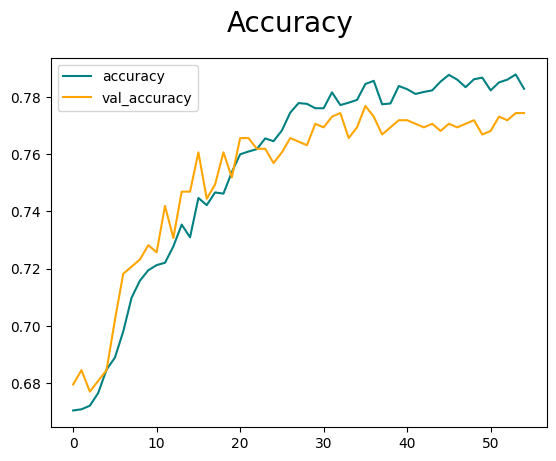

In [124]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

26/26 [==============================] - 0s 12ms/step


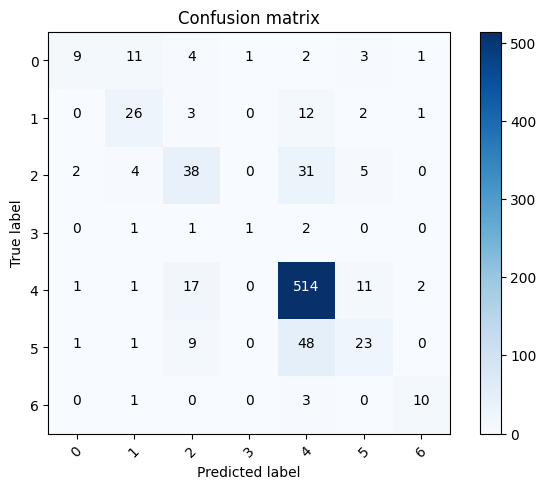

In [125]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Predict the values from the validation dataset
Y_pred = model.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

63/63 [==============================] - 0s 6ms/step


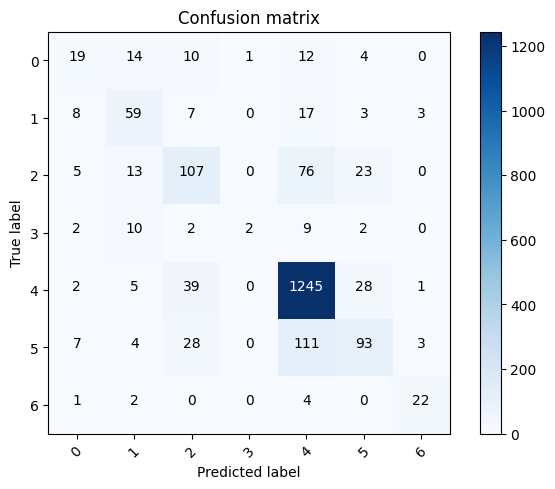

In [126]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

Text(0, 0.5, 'Fraction classified incorrectly')

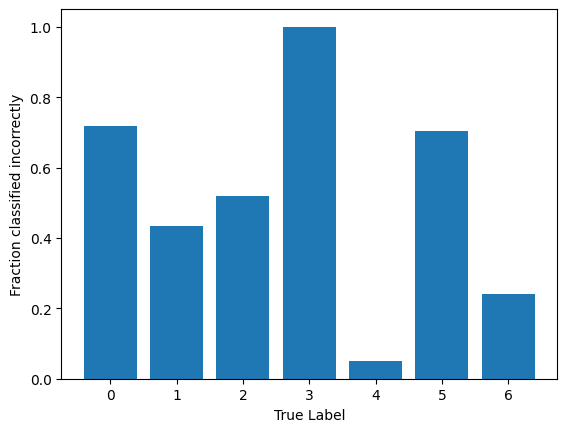

In [96]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

In [134]:
new_df = df[['dx', 'cell_type_idx']]
new_df = new_df.sort_values(by='cell_type_idx', ascending=True)
new_df.to_csv('label.csv', index=False)